# Lab5 Objects Dunders, Static and Classmethods

Reminder: пайтон це мова програмування, в якій є можливість писати код згідно з OOP парадігмою програмування. Для створення об'єктів в пайтон існує ключове слово `class` після якого має бути створений клас, інстанс якого можна створити і отримати інстанс класа. 

In [ ]:
class JustAReminder:
    class_atribute = []
    
    def __init__(self, arg1, arg2):
        self.instance_attribute1 = arg1
        self.instance_attribute2 = arg2
        
    def method(self, arg):
        pass

Що відбувається коли ви описуєте клас? Коли ваша програма считала опис класа, вона створює об'єкт класа, в даному випадку об'єктом класа є `JustAReminder`

In [ ]:
JustAReminder

Коли інтерпритатор пайтона считав цей об'єкт, він зберіг його в пам'яті і надав унікальний `id`.

In [ ]:
id(JustAReminder)

Також він створив для цього об'єкту (ми все ще говоримо про об'єкт класу `JustAReminder`) унікальний словник, який називається `namespace` - або `простір імен`. Цей простір імен є класовим атрібутом `__dict__`. Власне, він створюється до кожного об'єкта пайтон **взагалі**. 

In [ ]:
def foo(): pass

In [ ]:
foo.__dict__

Оскількі це атрібут, ми можемо отримати його значеня користуючись об'єктом класа та точкою:

In [ ]:
JustAReminder.__dict__

До об'єкту класу ми можемо додавати атрибути, методи, тощо *(цим не треба користуватися на реальних проектах, просто щоб ви знали що так робити можна)*. І, відповідно, `__dict__` об'єкту класу буде оновлюватися до наших змін, тобто:

In [ ]:
def foo(): print('Hi!')
attr = "Its me, an attribute"

JustAReminder.somefoo = foo
JustAReminder.someattribute = attr

In [ ]:
JustAReminder.__dict__

І ми навіть можемо їх викликати, або скористуватися як функціями (за умов якщо вона є `__callable__` (про це пізніще)

In [ ]:
JustAReminder.somefoo()

In [ ]:
JustAReminder.someattribute

`__dict__` є атрибутом, який вміщуює в собі всі аттрибути класа в строковому вигляді, і він використовується самим пайтоном для отримання того чи іншого атрібута того чи іншого об'єкта. Більш детально [python descriptors](https://docs.python.org/3/howto/descriptor.html). Нажаль, ця тема входить в курс лише поверхнево. Ось приклад того як працює пайтон 'під капотом' коли намагєтеся отримати той чи інший аттрібут через `obj.attr`

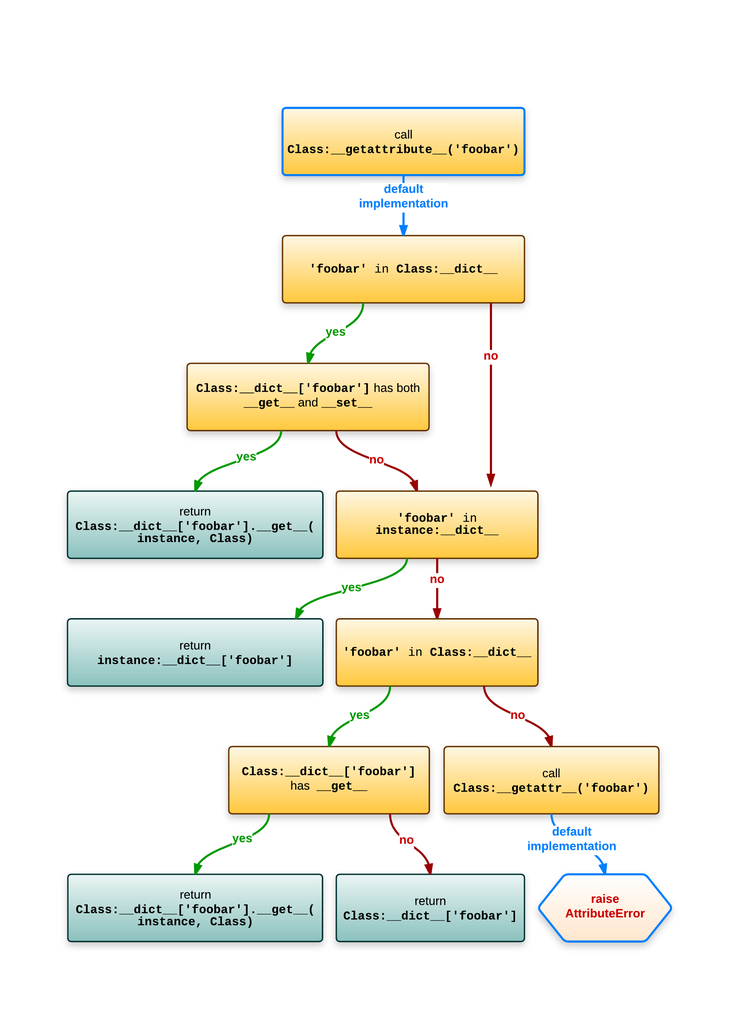

Окрім `__dict__` створюються і інші дефолтні поля класа, такі, наприклад як `__class__`, і так далі, більш детально ви можете ознайомитися з ними [тут](https://docs.python.org/3/reference/datamodel.html#the-standard-type-hierarchy) в параграфі `Custom Classes`

Всі ці об'єкти, які знаходяться в `__dict__` об'єкту класа є **атрібутами** об'єкту класа, якщо ми хочемо створити інстанс, користуючись цим класом, ми маємо скористуватися їм як функцією та передати аргументи, які описані в `__init__` (методі ініціалізації).

In [ ]:
reminder_instance = JustAReminder(None, None)

Простір імен інстранса `reminder_instance` вже буде мати сукупність імен саме інстанса, повертаючись до схеми ви можете побачити що спочатку при запросі на атрибут ми звертаємо увагу на об'єкт класу, а тількі потім на його інстанс при пошуку елемента

In [ ]:
reminder_instance.__dict__

Також як і з об'єктом класа, до об'єкта інстанса класа ми можемо додавати будь які атрибути, користуючись наступним сінтаксісом:

In [ ]:
def foo(): print('Hi!')
attr = "Its me, an attribute"

reminder_instance.somefoo = foo
reminder_instance.someanotherfoo = lambda x, y: x if y else None
reminder_instance.attr = attr

In [ ]:
reminder_instance.__dict__

Сподіваюсь приклад краще прояснить сітуацію з аттрібутами класа та інстанса.

Далі, прояснемо момент з `self`- можливо хтось з вас не зрозумів, що це значить насправді і як ним користуватися.

In [ ]:
class SelfReminder:
    
    def __init__(self, arg):
        self.arg = arg
    
    def somemethod(self):
        return self.arg

`SelfReminder` є об'єктом класу, який має метод `somemethod`, який приймає аргумент `self`. Давайте створемо об'єкт інстанса `SelfReminder` і спробуємо скористатися його методом:

In [ ]:
selfrem1_instance = SelfReminder("argument passed to selfrem1")
selfrem2_instance = SelfReminder("argument passed to selfrem2")

In [ ]:
selfrem1_instance.somemethod()

In [ ]:
selfrem2_instance.somemethod()

Давайте подивимося на `__dict__` цих інстансів:

In [ ]:
selfrem1_instance.__dict__

In [ ]:
selfrem2_instance.__dict__

Так щож робить `self`? Річ у тому, що методи, які ви об'явили при створенні класа, належать лише до об'єкту класа, тобто:

In [ ]:
SelfReminder.__dict__

In [ ]:
'somemethod' in SelfReminder.__dict__

Коли ви застосовуєте будь який метод, насправді, викликається метод об'єкту класа, і в якості аргумента `self`, до нього передається інстанс, який викликав цей метод, тобто:

In [ ]:
print(selfrem2_instance.somemethod(), "A call from an instance of the class")

# it is also the same as
print(SelfReminder.somemethod(selfrem2), "A call from a class with passing instance as an argument")

Тобто, ще раз, аргумент `self` - це інстанс класа, переданий в якості аргумента, до якого можна звертатися в пошуку атрібутів, методів і так далі.

Цей аргумент навіть може не називатися `self`, в інших мовах програмування він може називатися, наприклад `this`:

In [ ]:
class Example:
    
    def __init__(this):
        print(f"{this=}")
    
    def a_method(instance):
        print(f"{instance=}")
        
ex = Example()
ex.a_method()

## Static and Classmethods

У випадку, коли вам треба, щоб якийсь клас мав змогу виконати метод без передачі аргумента `self`, ви можете скористатися `built-in` функціями `classmethod` та `staticmethod`. Почнемо зі `staticmethod`:

Уявимо що ви хочете написати клас, який будете використовувати як контейнер для інструментів. Наприклад, ви працюєте зі звуками, і вам потрібно звертатися до інструментів, які лежать в одному місці та виконувати якісь задачі, проте вам не потрібен його інстанс, просто функції, які що є об'єднаними в якийсь клас:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ToolsStorage:
    
    @staticmethod
    def amplify(x: np.ndarray, factor: int):
        return x + factor
    
    @staticmethod
    def reduce(x: np.ndarray, factor: int):
        return x - factor
    
    @staticmethod
    def plot(x: np.ndarray):
        plt.plot(x)

In [ ]:
x = np.linspace(0, np.pi * 4, 400)
y = np.sin(x)

In [ ]:
ToolsStorage.plot(y)

In [ ]:
y_ampl = ToolsStorage.amplify(y, 5)
ToolsStorage.plot(y_ampl)

In [ ]:
y_reduced = ToolsStorage.reduce(y, 5)
ToolsStorage.plot(y_ampl)

Як ви могли побачити, завдяки `staticmethod` - ми можемо не створювати інстанс, і, віпдовідно, не передавати його в якості аргумента. При цьому, статичні методи все ще доступні якщо ви створете інстанс і звернетесь до статичного метода через `self`

In [ ]:
class Test:
    
    @staticmethod
    def do_action(arg):
        print(f"Got an arg {arg} to perform an action inside staticmethod")
        
    def d0_action_again(self, arg):
        self.do_action(arg)
        print(f"Got an arg {arg} to perform inside instance method!")

t = Test()
t.d0_action_again(5)

Якщо вам потрібно, щоб ваш метод звертався до аттрибутів класа, ви можете скористатися декоратором `classmethod`, та зазначити в вашому методі аргумент `cls` - він буде працювати так само як і `self`, проте замість об'єкта інстанса, в змінну `cls` буде потрабляти об'єкт класа:

In [ ]:
class Test2:
    
    attr = (3, 4)
    
    @staticmethod
    def do_action(arg):
        print(f"Got an arg {arg} to perform an action inside staticmethod")
    
    @classmethod
    def foo(cls, arg):
        print(f"Got an arg {arg} to perform an action inside classmethod")
        cls.do_action(arg)
        print(f"I also can see the class attributes! {cls.attr}")
        

Test2.foo(5)

## Dunder (Magic) Methods

`Dunder` - або магічні методи це спеціальні методи, які ви можете створити, щоб додати 'магію' до вашого класу або  - задекларувати якусь спеціальну поведінку класу при взаємодією з `built-in` функціями, операторами, створенням класів, видаленням, взяттям та віддаванням атрибутів тощо.

Магічні методи можна розділити на наступні категорії:
* методи створення, ініціалізації, і пр. `__new__`, `__init__`, `__del__`
* магічні методи порівняння `__eq__` `__cmp__`
* магічні методи які відповідають за унарні операції `__neg__`, `__abs__`, `__round__`
* методи що відповідають за бінарні операції `__add__`, `__div__`, `__add__`
* методи присваювання-модифікації `__iadd__`, `__isub__`, `__ifloordiv__`
* методи конвертації типів `__str__`, `__int__`, `__float__`
* методи репрезентації ваших класів `__repr__`, `__format__`
* методи менеджера контексту `__enter__`, `__exit__`
* методи ітераторів і послідовностей `__iter__`, `__next__`, `__len__`
* методи отримування \ додавання атрибутів в класс `__getattr__`, `__setattr__`
* методи дескрипторів `__get__`, `__set__`
* інші методи, які не підпадають під класифікацію

Повний список методів, та детально щодо того за що вони відповідають можна почитати [тут](https://rszalski.github.io/magicmethods/), і [тут](https://docs.python.org/3/reference/datamodel.html#special-method-names)

###  Методи створення, ініціалізації, і пр

Ці методи відповідають за створення нових об'єктів. Деякі з них ви вже бачили, наприклад `__init__`, деякі ми ще будемо розбирати на наступній лабораторній роботі\ лекції, наприклад `__new__`. Проте одним із методів, які хотілося-б обсудити є метод `__call__`. Взагалі, любий сінтаксіс по типу `obj()` є так званим call - викликом. А об'єкти які можуть бути викликаними - callable або викликаємими:

Оскількі все в пайтоні є об'єктом, тому ми можемо створити об'єкт, який можна викликати - 'як функцію', наприклад:

In [ ]:
class FN:
    
    def __init__(self, w, b):
        self._w = w
        self._b = b
    
    def __call__(self, x):
        return self._w * x + self._b

f = FN(10, 3)

f(5)

### Методи порівняння

Методи порівнняння в пайтон визначають взаємодію операторів порівння `>, <, ==, !=` з об'єктом.Всі оператори порівняння, з якими ви стикалися, насправді працюють наступним чином - об'єкт, що порівнюється, і який стоїть зліва, викликає в себе метод порівняння в залежності від оператора і додає об'єкт, що стоїть справа від знака порівняння в якості аргумента до цього метода:

In [ ]:
a = 5
b = 4

print(f"{a > b = }", "with operator")
print(f"{a.__gt__(b) = }", "what actually happens")

Тобто, всі оператори порівнняння, які ви бачили працюють саме таким чином.

Якщо у вас є бажання задекларувати якесь особливу поведінку при порівнянні (при створенні звичайного класу в нього по замовченням є лише підтримка оператора порівняння) вам необхідно в описі своєго класу створити відповідні методи:

In [ ]:
class Human:
    
    def __init__(self, weight, height, age, name):
        self._weight = weight
        self._height = height
        self._age = age
        self._name = name
    
    def __gt__(self, other):
        
        return self._height > other._height
    
    def __ge__(self, other):
        
        return self._height >= other._height

fillip = Human(79, 178, 24, "Fillip")
bill = Human(109, 201, 42, "Bill")

print(fillip > bill)

Тобто, це все одно що:

In [ ]:
fillip.__gt__(bill)

### Методи унарних операцій

До унарних операцій відносяться всі операції з одним об'єктом, як і в математиці, в тому числі, наприклад, коли ви пишете `c = -a`, `-a` це є унарною операцією, по факту `-a` -> `a.__neg__()`. Як і з іншими методами, якщо вам треба переопреділити поведінку вашого класу, ви передекларуєте ці методи з поведінкою, яку ви хочете додати

### Методи бінарних операцій

Як і в випадку з операторами порівняння, аріфметичні операції `+, -, /, //, *, **` насправді просто викликають відповідний метод у об'єкта зліва від оператора `a + b  ->  a.__add__(b)`. Однак тут також треба зазначити, що в пайтоні є змога переопріділити поведінку класу, щоб метод викликався не в `a`, а в `b`, для цього в `b` повинен бути імплементований метод `__radd__` (reverse add). У випадку наявності такого методу виконається наступне 
`a + b  ->  b.__radd__(a)`

### Методи присваювання-модифікації

Методи які працюють і викликаються за умов використання операторів `+=, *=, -=` і так далі, працюють також як і оператори порівняння та бінарних операцій, приймають аргументом `other`.

## Методи ітераторів і послідовностей

Уявимо, що вам необхідно створити якийсь особливий ітератор, наприклад, той, що спочатку повертає останній елемент послідовності, потім він повертає нульовий, потім -2, потім 1 і так далі, для цього, ви можете скористатися магічними методами ітератоів, а саме `__iter__` та `__next__`

In [ ]:
class MyStrangeList:
    
    def __init__(self, sequence):
        self._seq = sequence
        self._rev_i = None
        self._forw_i = None
        self._cur_i = None
    
    def __iter__(self):
        self._cur_i = 0
        self._rev_i = -1
        self._forw_i = 0
        return self
    
    def __next__(self):

        if self._cur_i < len(self._seq):
            
            if self._cur_i % 2 == 0:
                elem = self._seq[self._forw_i]
                self._forw_i += 1
                self._cur_i += 1
                
            else:
                elem = self._seq[self._rev_i]
                self._rev_i -= 1
                self._cur_i += 1
        else:
            raise StopIteration
        
        return elem
        

In [ ]:
t = MyStrangeList([1, 2, 3, 4, 5])

for i in t:
    print(i)

Однак, за таких умов, коли ми маємо якусь послідовність, але ми не можемо взяти довжину від нашого об'єкта. 

In [ ]:
len(t)

Тоді, його можна імплементувати, просто користучись магічним методом `__len__`

In [ ]:
class MyStrangeList:
    
    def __init__(self, sequence):
        self._seq = sequence
        self._rev_i = None
        self._forw_i = None
        self._cur_i = None
    
    def __iter__(self):
        self._cur_i = 0
        self._rev_i = -1
        self._forw_i = 0
        return self
    
    def __next__(self):

        if self._cur_i < len(self._seq):
            
            if self._cur_i % 2 == 0:
                elem = self._seq[self._forw_i]
                self._forw_i += 1
                self._cur_i += 1
                
            else:
                elem = self._seq[self._rev_i]
                self._rev_i -= 1
                self._cur_i += 1
        else:
            raise StopIteration
        
        return elem
    
    def __len__(self):
        return len(self._seq)

In [ ]:
t = MyStrangeList([1, 2, 3, 4, 5])
len(t)

Ви вже мали уловити патерн, за яким працює пайтон та його взаємодія об'єктів - згадайте, наприклад білт-ін функції по типу `len`, `list`, `abs`. Всі вони - просто викликають відповідний метод об'єкта. Оператори? Вони теж викликають методи об'єкта пов'язані з цим об'єктом. Створення ітераторів та циклів - також посилаємося на об'єкт і так далі.